<a href="https://colab.research.google.com/github/pouriakouhzadeh/Crypto-forcast-by-LSTM/blob/master/Ada%20forcast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
data = pd.read_csv('ADAUSD.csv', date_parser = True)
# data.keys()
# data.columns=['Date', 'time', 'open', 'high', 'low','close','vlome']
data.dropna(subset = ["Close"], inplace=True)
data['Date'] = pd.to_datetime(data['Date'])
# Reverse rows using iloc() Function
data = data.iloc[::-1]
data

,Unix,Date,Symbol,Open,High,Low,Close,Volume,Volume Base Asset,tradecount
22723,1.600000e+12,2020-08-26,ADAUSD_PERP,0.11279,0.11368,0.11169,0.11222,19523,1.734808e+06,415
22722,1.600000e+12,2020-08-26,ADAUSD_PERP,0.11218,0.11390,0.11218,0.11390,19002,1.681114e+06,395
22721,1.600000e+12,2020-08-26,ADAUSD_PERP,0.11398,0.11504,0.11384,0.11419,23501,2.055462e+06,575
22720,1.600000e+12,2020-08-26,ADAUSD_PERP,0.11410,0.11500,0.11351,0.11359,19314,1.692635e+06,401
22719,1.600000e+12,2020-08-26,ADAUSD_PERP,0.11354,0.11465,0.11189,0.11239,21487,1.899170e+06,450
...,...,...,...,...,...,...,...,...,...,...
4,1.680000e+12,2023-04-06,ADAUSD_PERP,0.38270,0.38520,0.38240,0.38390,31728,8.269269e+05,867
3,1.680000e+12,2023-04-06,ADAUSD_PERP,0.38380,0.38520,0.38120,0.38200,48105,1.255351e+06,1180
2,1.680000e+12,2023-04-06,ADAUSD_PERP,0.38190,0.38300,0.38070,0.38190,58956,1.543282e+06,1193
1,1.680000e+12,2023-04-06,ADAUSD_PERP,0.38190,0.38320,0.38170,0.38310,27354,7.151011e+05,696


In [ ]:
data_training = data[data['Date']< '2023-03-01'].copy()
data_test = data[data['Date']>= '2023-03-01'].copy()

training_data = data_training.drop(['Unix', 'Date','Symbol'], axis = 1)
training_data

 


,Open,High,Low,Close,Volume,Volume Base Asset,tradecount
22723,0.11279,0.11368,0.11169,0.11222,19523,1.734808e+06,415
22722,0.11218,0.11390,0.11218,0.11390,19002,1.681114e+06,395
22721,0.11398,0.11504,0.11384,0.11419,23501,2.055462e+06,575
22720,0.11410,0.11500,0.11351,0.11359,19314,1.692635e+06,401
22719,0.11354,0.11465,0.11189,0.11239,21487,1.899170e+06,450
...,...,...,...,...,...,...,...
892,0.36100,0.36100,0.35450,0.35460,207274,5.799577e+06,3115
891,0.35460,0.35530,0.35210,0.35380,118287,3.343945e+06,2418
890,0.35380,0.35380,0.34850,0.35060,362298,1.034739e+07,4429
889,0.35060,0.35260,0.34930,0.35250,78589,2.236575e+06,1846


In [ ]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[0.01205937, 0.01210502, 0.01220523, ..., 0.00076609, 0.00895871,
        0.00245083],
       [0.01185733, 0.01217768, 0.01236962, ..., 0.00074521, 0.00868027,
        0.00232736],
       [0.01245351, 0.01255421, 0.01292654, ..., 0.00092554, 0.01062154,
        0.00343857],
       ...,
       [0.09188435, 0.09141353, 0.09165327, ..., 0.0145053 , 0.05362144,
        0.02723075],
       [0.09082448, 0.09101718, 0.09192167, ..., 0.00313359, 0.01156075,
        0.01128493],
       [0.09142066, 0.09128141, 0.09252556, ..., 0.00551011, 0.02027214,
        0.01399504]])

In [ ]:
X_train = [] 
Y_train = []
training_data.shape[0]
for i in range(60, training_data.shape[0]):
    X_train.append(training_data[i-60:i])
    Y_train.append(training_data[i,0])
     
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train.shape

(21776, 60, 7)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
#Initialize the RNN
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 7)))
model.add(Dropout(0.2))
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units =1))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 60, 50)            11600     
                                                                 
 dropout_20 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_21 (LSTM)              (None, 60, 60)            26640     
                                                                 
 dropout_21 (Dropout)        (None, 60, 60)            0         
                                                                 
 lstm_22 (LSTM)              (None, 60, 80)            45120     
                                                                 
 dropout_22 (Dropout)        (None, 60, 80)            0         
                                                                 
 lstm_23 (LSTM)              (None, 120)              

In [91]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
history= model.fit(X_train, Y_train, epochs = 20, batch_size =50, validation_split=0.1)

Epoch 1/20
392/392 [==============================] - 123s 298ms/step - loss: 0.0074 - val_loss: 5.1432e-05
Epoch 2/20
392/392 [==============================] - 115s 295ms/step - loss: 0.0028 - val_loss: 2.9162e-04
Epoch 3/20
392/392 [==============================] - 113s 289ms/step - loss: 0.0022 - val_loss: 8.4776e-04
Epoch 4/20
392/392 [==============================] - 114s 292ms/step - loss: 0.0017 - val_loss: 9.8422e-04
Epoch 5/20
392/392 [==============================] - 114s 290ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 6/20
392/392 [==============================] - 112s 287ms/step - loss: 0.0015 - val_loss: 6.7980e-04
Epoch 7/20
392/392 [==============================] - 115s 293ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 8/20
392/392 [==============================] - 115s 293ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 9/20
392/392 [==============================] - 115s 294ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 10/20
392/392 [=======================

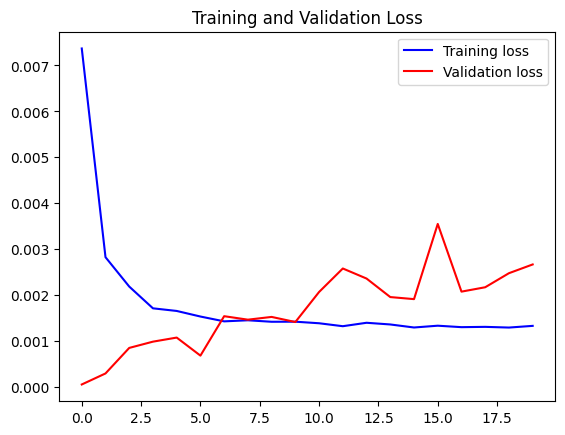

In [92]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [94]:
part_60_days = data_training.tail(60)
df= part_60_days.append(data_test, ignore_index = True)
df = df.drop(['Unix', 'Date','Symbol'], axis = 1)
df.head()

<ipython-input-94-36ee65349180>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df= part_60_days.append(data_test, ignore_index = True)


,Open,High,Low,Close,Volume,Volume Base Asset,tradecount
0,0.3642,0.3647,0.3620,0.3625,176248,4852776.229,2094
1,0.3625,0.3633,0.3620,0.3633,82848,2285247.903,1226
2,0.3633,0.3651,0.3624,0.3624,98592,2712012.669,1695
3,0.3624,0.3629,0.3612,0.3622,136805,3780094.266,2132
4,0.3622,0.3629,0.3616,0.3617,63375,1750249.990,1081


In [96]:
inputs = scaler.transform(df)

In [97]:
X_test = []
Y_test = []
for i in range (60, inputs.shape[0]):
    X_test.append(inputs[i-60:i]) 
    Y_test.append(inputs[i, 0])
X_test, Y_test = np.array(X_test), np.array(Y_test)
Y_pred = model.predict(X_test) 

28/28 [==============================] - 2s 63ms/step


In [98]:
scale = 1/5.18164146e-05
Y_test = Y_test*scale 
Y_pred = Y_pred*scale

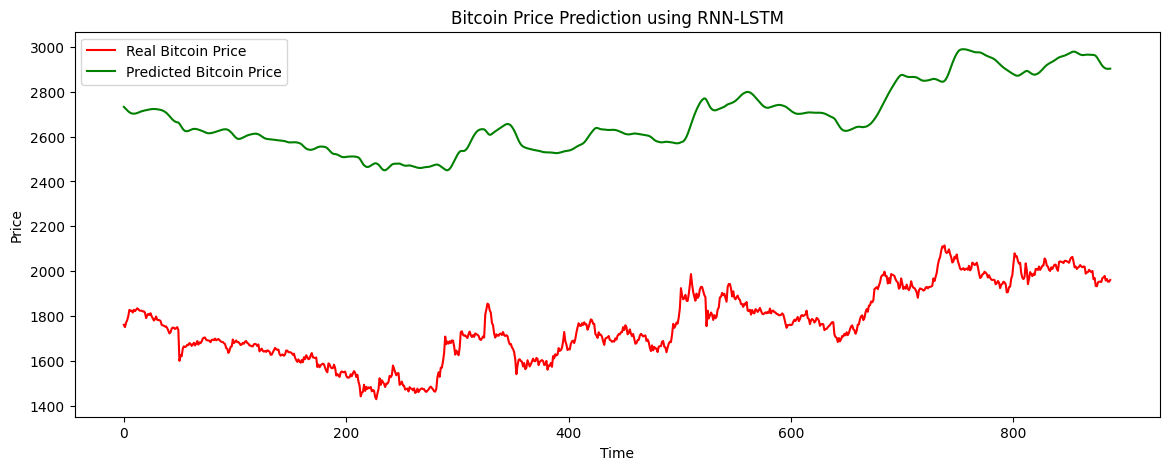

In [99]:
plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'red', label = 'Real Bitcoin Price')
plt.plot(Y_pred, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()